## Primer: genomski podatki v obliki nizov znakov

Stopnja razvoja na področju biotehnologije omogoča pridobivanje bistveno več podatkov o organizmih. Eden pogostih podatkovnih tipov, s katerimi primerjamo vrste so genske zapisi. Ti so pripravni za predstavitev v računalništvu, saj jih lahko posplošimo na zaporedna štirih nukleotidov: A, C, G, T. Celoten genski zapis ki določa vse, od vaše barve oči do nagnjenosti do določenih bolezni je podano z nekaj več kot $3 \times 10^{12}$ dolgim zaporednjem DNK.

Pri razmoževanju prihaja do prepisovanja in kombiniranja DNA zapisov staršev. Ta proces seveda ni popoln, zato prihaja do napak - <i>mutacij</i>. Dolgoročna posledica mutacij pa je natanek različnih živalskih vrst, kar pomeni, da imajo sorodnejše vrste bolj podobne genske zapise.

Iz baze genskih zapisov smo naložili zaporednja mitohondrijskega gena za 13 vrst: `'Gorilla gorilla', 'Homo sapiens', 'Carassius auratus auratus', 'Delphinus capensis', 'Chamaeleo calyptratus', 'Canis lupus familiaris', 'Homo sapiens neanderthalensis', 'Rattus norvegicus', 'Equus caballus', 'Daboia russellii', 'Pan troglodytes', 'Takifugu rubripes', 'Pongo abelii', 'Sus scrofa'`.

## Example: genomic data in the form of character strings

The degree of development in the field of biotechnology allows for the acquisition of substantially more data on organisms. One of the common data types we compare genes are genetic records. They are ready for presentation in computing, since they can be generalized to successive four nucleotides: A, C, G, T. The entire gene that determines everything from your eye color to the tendency to certain illnesses is given with something more than $3 \times 10^{12}$ in the long sequence DNA.

When decomposing, the transcription and combining of DNA records of parents occurs. Of course, this process is not complete, so there are errors - <i>mutacij</i>. The long-term consequence of mutations is a tale of different animal species, which means that more related species have more similar genetic records.

From the genetic database, we have ordered a series of mitochondrial genes for 13 species: `'Gorilla gorilla', 'Homo sapiens', 'Carassius auratus auratus', 'Delphinus capensis', 'Chamaeleo calyptratus', 'Canis lupus familiaris', 'Homo sapiens neanderthalensis', 'Rattus norvegicus', 'Equus caballus', 'Daboia russellii', 'Pan troglodytes', 'Takifugu rubripes', 'Pongo abelii', 'Sus scrofa'`.

Podatke najprej pridobimo iz spleta.

First we obtain the data from the internet.

In [1]:
from Bio import Entrez
from Bio import SeqIO
import json

species = [
    ("Homo sapiens",            "NC_012920.1"),
    ("Pan troglodytes",         "NC_001643.1"),
    ("Equus caballus",          "NC_001640.1"),
    ("Chamaeleo calyptratus",   "NC_012420.1"),
    ("Delphinus capensis",      "NC_012061.1"),
    ("Takifugu rubripes",       "NC_004299.1"),
    ("Canis lupus familiaris",  "NC_002008.4"),
    ("Gorilla gorilla",         "NC_001645.1"),
    ("Pongo abelii",            "NC_002083.1"),
    ("Sus scrofa",              "NC_000845.1"),
    ("Daboia russellii",        "NC_011391.1"),
    ("Carassius auratus auratus", "NC_006580.1"),
    ("Rattus norvegicus",       "AC_000022.2"),
    ("Homo sapiens neanderthalensis", "NC_011137.1"),
]

# Data loading
infile = "podatki/seqs.json"
seqs = dict()
for name, sid in species:
    print("Loading ...", name)
    t = False
    while not t:
        try:
            handle = Entrez.efetch(db="nucleotide", rettype="gb", id=sid,
                           email="a@gmail.com")
            rec = SeqIO.read(handle, "gb")
            handle.close()
            t = True
        except:
            continue
    seqs[name] = str(rec.seq)   

json.dump(seqs, open(infile, "w"))

Loading ... Homo sapiens
Loading ... Pan troglodytes
Loading ... Equus caballus
Loading ... Chamaeleo calyptratus
Loading ... Delphinus capensis
Loading ... Takifugu rubripes
Loading ... Canis lupus familiaris
Loading ... Gorilla gorilla
Loading ... Pongo abelii
Loading ... Sus scrofa
Loading ... Daboia russellii
Loading ... Carassius auratus auratus
Loading ... Rattus norvegicus
Loading ... Homo sapiens neanderthalensis


In [3]:
import json
sequences = json.load(open("podatki/seqs.json"))
print(sequences["Homo sapiens"])  
print(len(sequences["Homo sapiens"]))

GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTTCGTCTGGGGGGTATGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTCGCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATTACAGGCGAACATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATAACAATTGAATGTCTGCACAGCCACTTTCCACACAGACATCATAACAAAAAATTTCCACCAAACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAAACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCACTTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAATCTCATCAATACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATACCCCGAACCAACCAAACCCCAAAGACACCCCCCACAGTTTATGTAGCTTACCTCCTCAAAGCAATACACTGAAAATGTTTAGACGGGCTCACATCACCCCATAAACAAATAGGTTTGGTCCTAGCCTTTCTATTAGCTCTTAGTAAGATTACACATGCAAGCATCCCCGTTCCAGTGAGTTCACCCTCTAAATCACCACGATCAAAAGGAACAAGCATCAAGCACGCAGCAATGCAGCTCAAAACGCTTAGCCTAGCCACACCCCCACGGGAAACAGCAGTGATTAACCTTTAGCAATAAACGAAAGTTTAACTAAGCTATACTAACCCCAGGGTTGGTCAATTTCGTGCCAGCCACCGCGGTCACACGATTAACCCAAGTCAATAGAAGCCGGCGTAAAGAGTGTTTTAGATCACCCCCTCCCCAATAAAGCTAAAACTCACCTGAGTTGTAAAAAACT

<font color="green"><b>Naredi sam/a.</b></font> Kako bi lahko primerjali živalske vrste glede na zapise, ki so podani kot nizi znakov? Prva ideja je, da podatke pretvorimo v vektorski prostor, v katerem bomo računali razdalje. Namig: zaporedja lahko razbiješ na manjše dele in prešteješ število pojavitev posameznih znakov, parov, trojk, ... k-terk. ahko upoštevaš tudi položaj v zaporedju. 

Dopolni in si pomagaj s funkcijo `seq_to_kmer_count`, ki pretvori niz znako v vektor števila pojavitev vseh mogožnih k-terk.

Prevedi podatke v ustrezno obliko, izvedi hierarhično gručenje in prikaži rezultate. Ali so vrste na dendrogramu postavljene smiselno? Dobiti morate sliko:

<img src="slike/nizi_dendrogram.png"></img> 

<font color="green"><b>Do it yourself.</b></font> How could you compare animal species with respect to the records that are given as character strings? The first idea is to convert the data into a vector space in which we calculate distances. Tip: You can break sequences into smaller parts and count the number of occurrences of individual characters, pairs, triples, ... k-tuples. You also take into account position in sequence.

Complete and help with the `seq_to_kmer_count` function, which converts the string into a vector of the number of occurrences of all possible k-tuples.

Translate the data into the appropriate format, perform hierarchical clustering and display results. Are the species on the dendrogram meaningful? You need to get a picture:

<img src="slike/nizi_dendrogram.png"></img>

In [4]:
from itertools import product
def seq_to_kmer_count(seq, k=4):
    """
    Pretvori zaporedje seq v vektor x.
         AAAA AAAC AAAG AAAT ... TTTG TTTT
    x = [   1  1      2   10 ...   12    7]
    len(x) == len(seq) - k + 1
    """
    
    ktuples = list(zip(*[seq[i:] for i in range(k)]))     # razbijemo trenutni niz seq na k-terke
    kmers   = list(product(*(k*[["A", "C", "T", "G"]])))  # vse mozne k-terke
    
    x = np.zeros((len(kmers), ))
    ### Your code here ### 
    # for i, kmer in enumerate(kmers)
    # ...
    
    return x

In [4]:
# ...
# Za vsako zaporedje (organizem), izračunaj x
# X = np.array([x1, x2, ..., x13]) - matrika 13 x 256 (k=4)
# pozeni gručenje

Rešitev

[[ 182.  157.  110. ...,   22.   18.   15.]
 [ 187.  149.  120. ...,   14.   13.   12.]
 [ 174.  159.  124. ...,   18.   13.   14.]
 ..., 
 [ 158.  125.  120. ...,   22.   31.   27.]
 [ 238.  160.  158. ...,   12.   18.   14.]
 [ 184.  156.  110. ...,   25.   18.   19.]]
(14, 256)


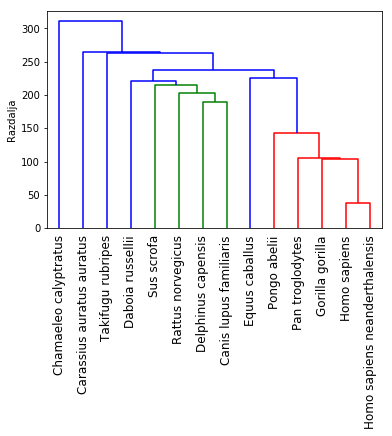

In [9]:
from itertools import product
import numpy as np
import scipy.cluster.hierarchy as sch
% matplotlib inline
import matplotlib.pyplot as plt

def seq_to_kmer_count(seq, k=4):
    ktuples = list(zip(*[seq[i:] for i in range(k)]))     # razbijemo niz na k-terke
    kmers   = list(product(*(k*[["A", "C", "T", "G"]])))  # vse mozne k-terke
    
    x = np.zeros((len(kmers), ))
    
    for ki, kmer in enumerate(kmers):
        x[ki] = ktuples.count(kmer)
    return x

# ...k = 4
k = 4
keys = sequences.keys()
X    = np.zeros((len(keys), 4**k))
for ki, ky in enumerate(keys):
    seq    = sequences[ky]
    X[ki]  = seq_to_kmer_count(seq, k=k)

print(X)
print(X.shape)
H = sch.linkage(X)
D = sch.dendrogram(H, labels=list(sequences.keys()), leaf_rotation=90)
plt.ylabel("Razdalja")
plt.show()